In [1]:
import pandas as pd

In [4]:
# Load data
data = pd.read_csv('melb_data.csv')

# Drop rows with missing values (simple approach for now)
data = data.dropna()

In [19]:
# Take a look at the data
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,6.751564e+05,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.200000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,8.800000e+05,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,1.325000e+06,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


In [12]:
# Select features and target
y = data['Price']

features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
X = data[features]

In [10]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [14]:
# First : linear regression
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Use MAE to evaluate
from sklearn.metrics import mean_absolute_error

linear_predictions = linear_model.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_predictions)
print(f"MAE: {linear_mae:.0f}")

MAE: 293072


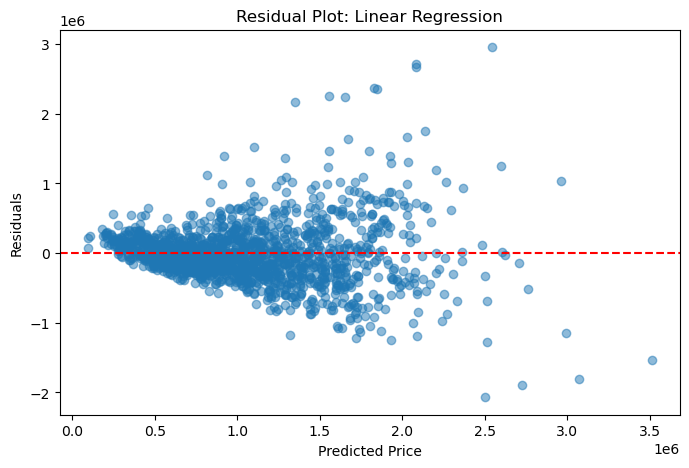

In [31]:
# Make plot
import matplotlib.pyplot as plt

# Residuals
linear_residuals = y_test - linear_predictions

plt.figure(figsize = (8, 5))
plt.scatter(linear_predictions, linear_residuals, alpha = 0.5)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot: Linear Regression")
plt.show()

In [26]:
# Second : Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state = 42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [32]:
tree_predictions = tree_model.predict(X_test)
tree_mae = mean_absolute_error(y_test, tree_predictions)
print(f"Decision Tree MAE: {tree_mae:.0f}")

Decision Tree MAE: 247902


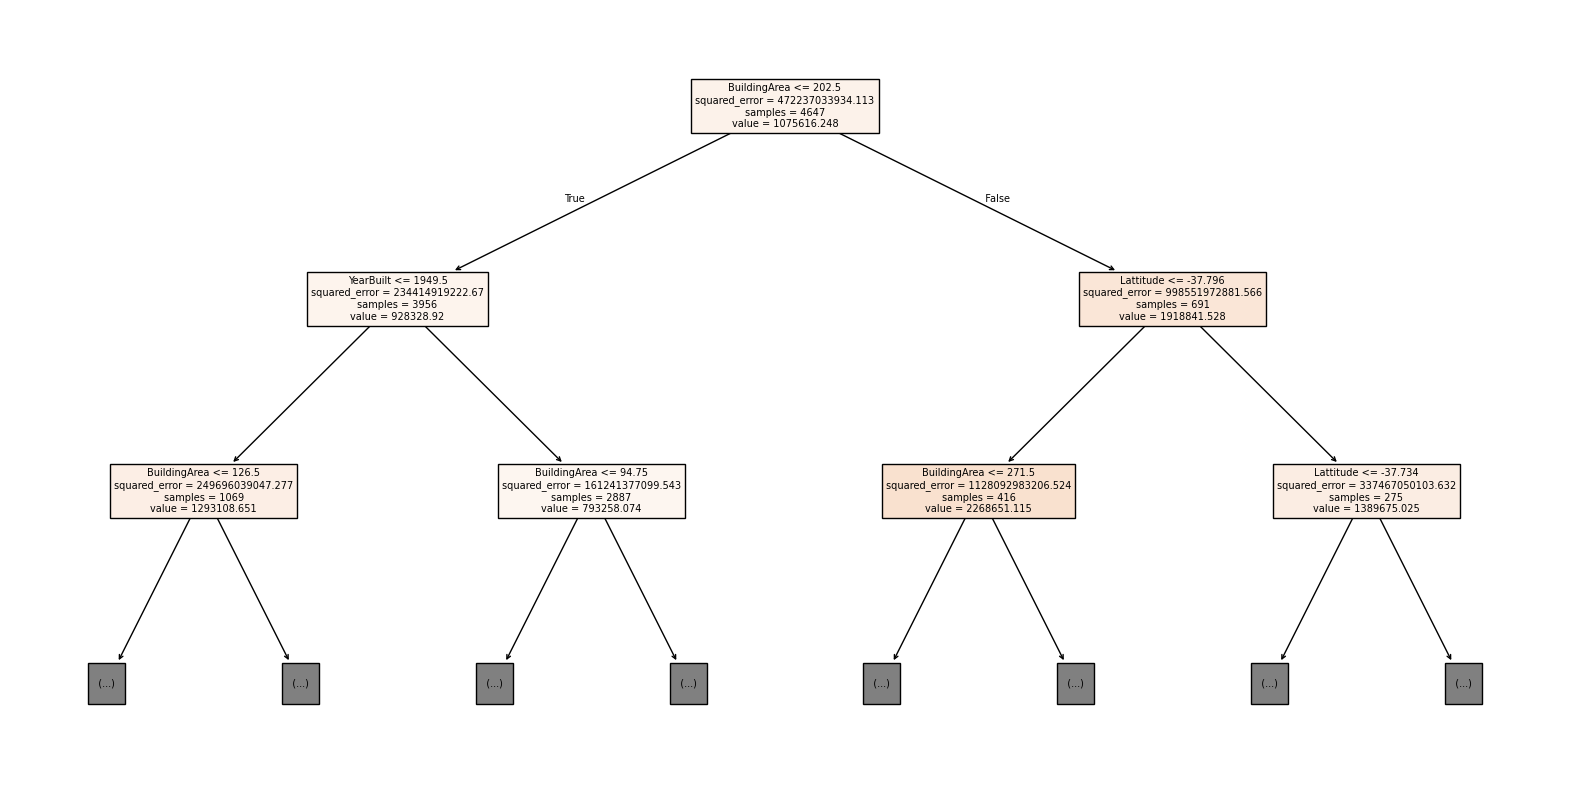

In [35]:
# Make plot
from sklearn.tree import plot_tree

plt.figure(figsize = (20, 10))
plot_tree(tree_model, feature_names = features, filled = True, max_depth = 2)
plt.show()

In [37]:
# Try to make it better 
pruned_tree = DecisionTreeRegressor(max_depth = 5, random_state = 42)
pruned_tree.fit(X_train, y_train)

pruned_predictions = pruned_tree.predict(X_test)
pruned_mae = mean_absolute_error(y_test, pruned_predictions)
print(f"Pruned Tree MAE: {pruned_mae:.0f}")

Pruned Tree MAE: 260739
